# We need unflinching idealism! Who do we call?

    White House Communications Director Sam Norman Seaborn (SNS)

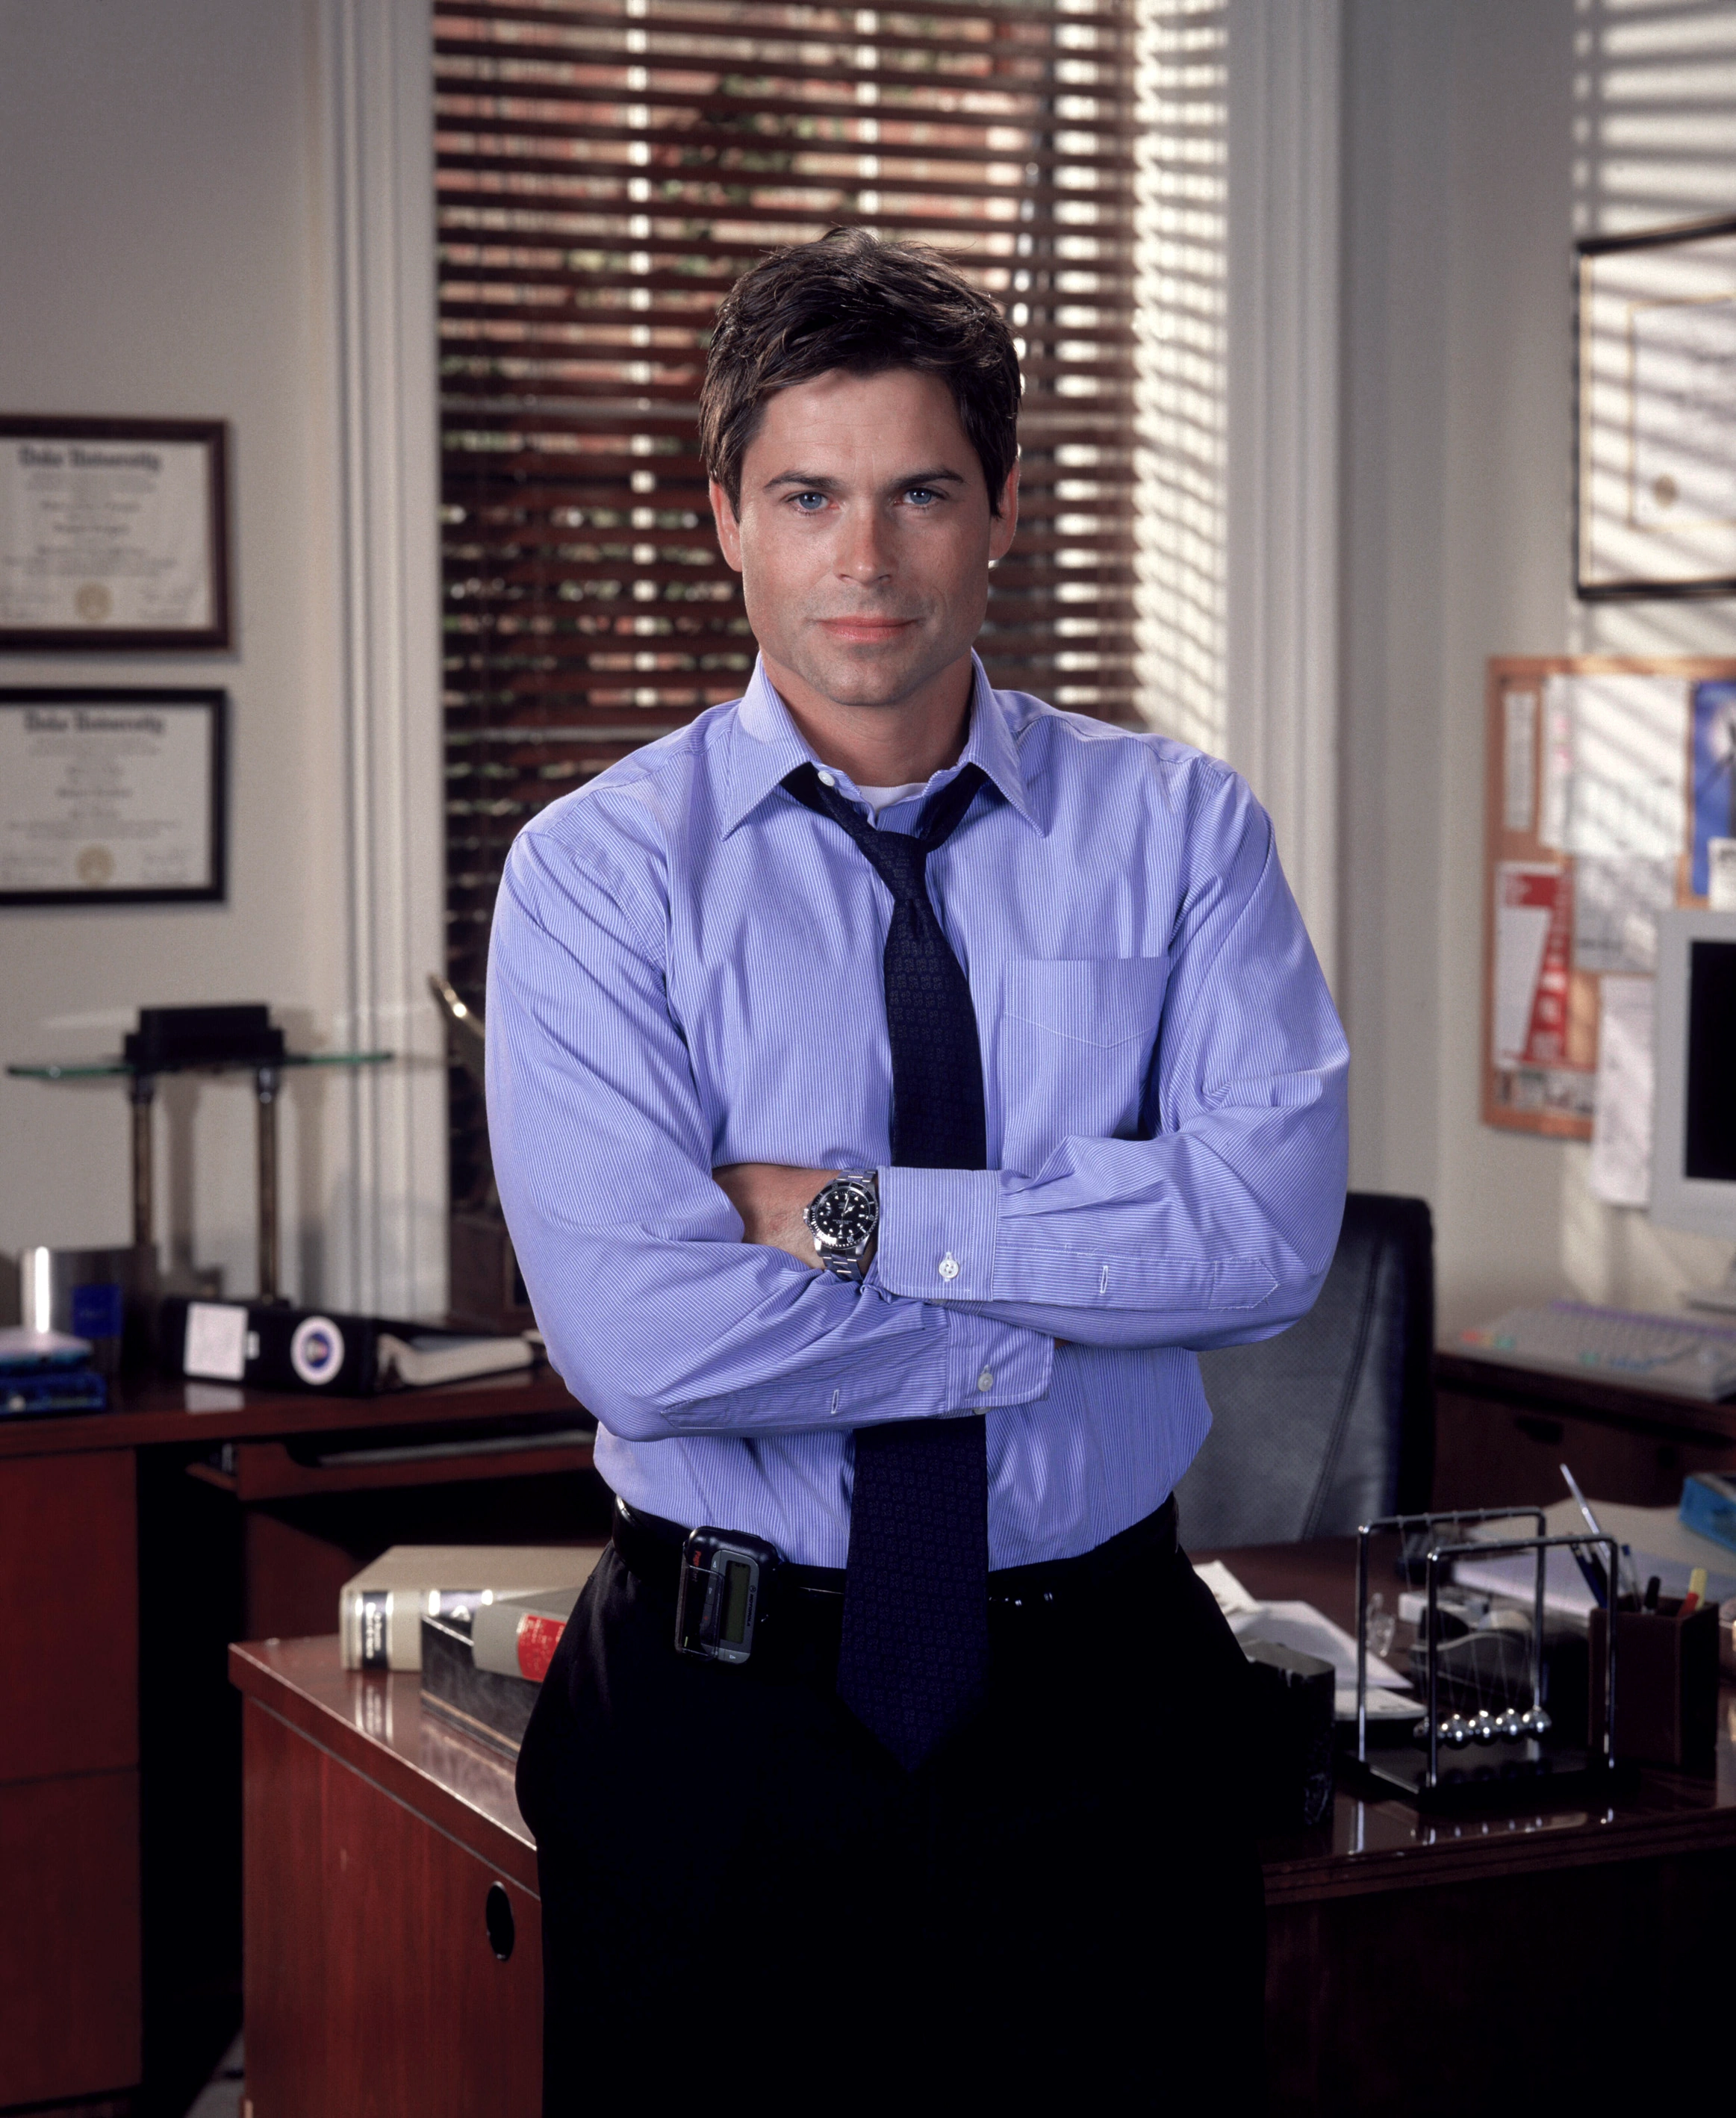

Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.
- Works best when data is 'tidy'

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

#sns.set_context('notebook') # other settings include paper/poster/talk 
#sns.set_style("ticks") # other styles include darkgrid/dark/whitegrid/white
#sns.set(rc = {'figure.figsize':(8,4)}) 

# You can manually set the resolution (size) of images (this WILL slow down rendering speed)
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

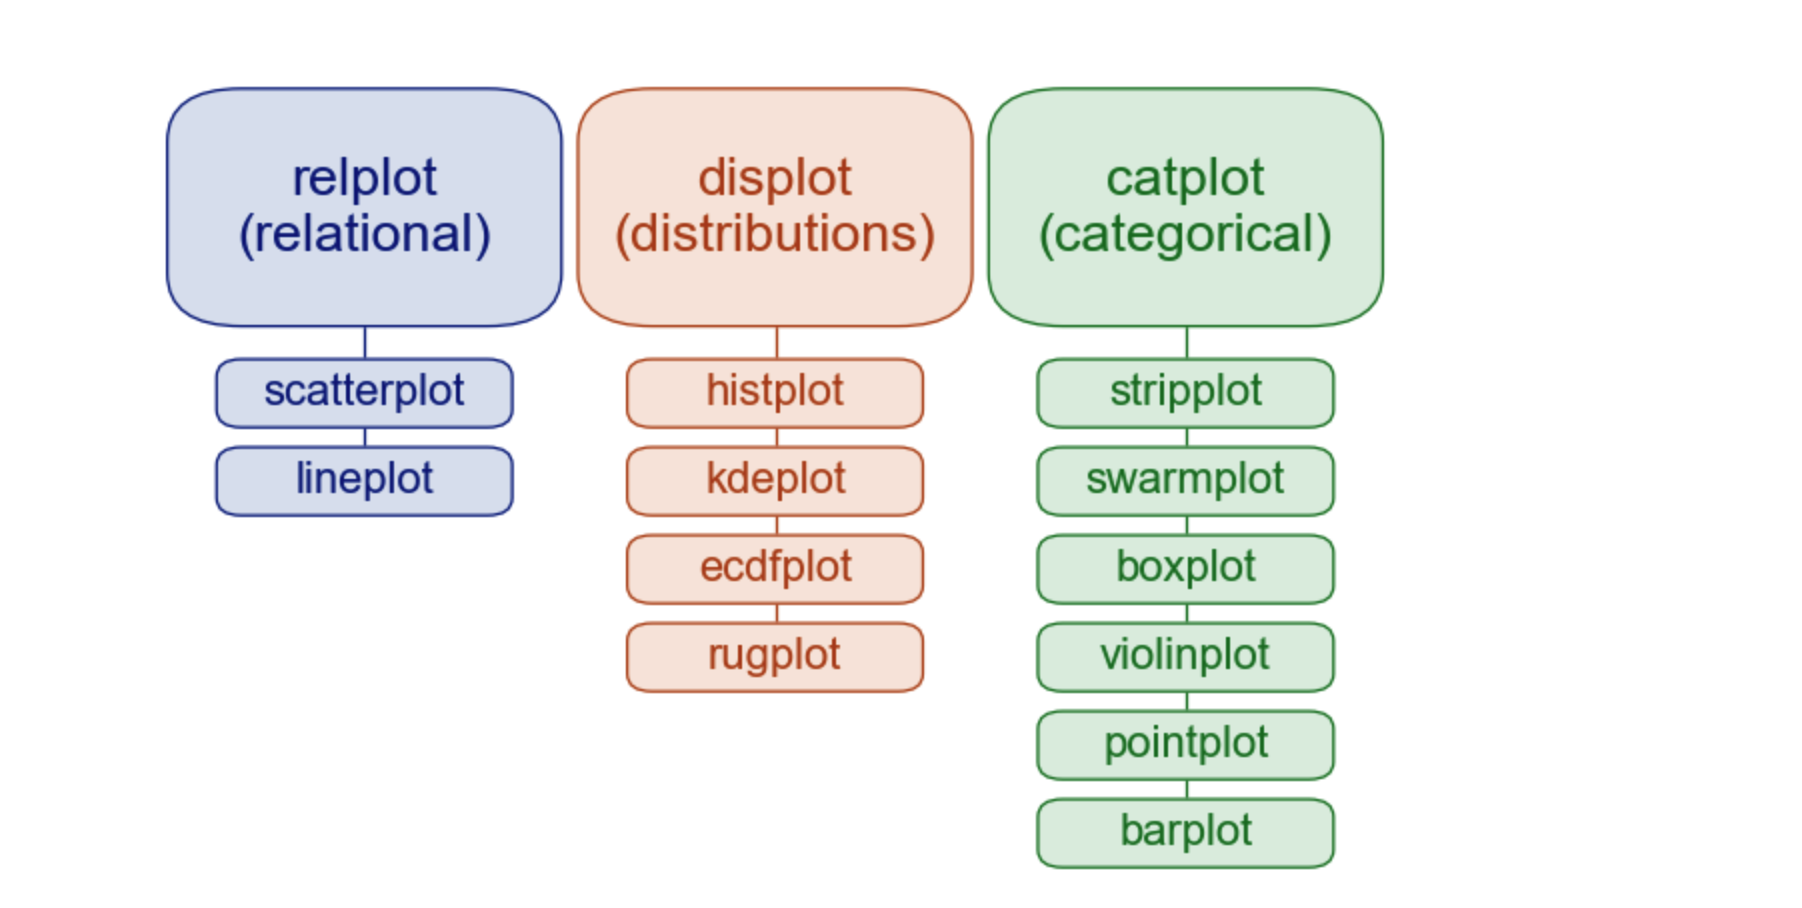

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [ ]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

In [ ]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [ ]:
# Option 2: Load using pydataset
tips = data('tips')

In [ ]:
data('tips', show_doc = True)

In [ ]:
# check the head
tips.head()

In [ ]:
# check for nulls and datatypes
tips.info()

#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

In [ ]:
# scatterplot in matplotlib
plt.scatter(tips.total_bill, tips.tip)

In [ ]:
# Explore relationship between total_bill and tip using relplot
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

In [ ]:
# Update defaults (rc params in matplotlib)

sns.set_theme()  # https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [ ]:
# same plot above, but with different sns defaults ()
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

In [ ]:
tips.head()

In [ ]:
smokers = tips[tips.smoker == 'Yes']
non_smokers = tips[tips.smoker == 'No']

In [ ]:
# the tradional matplotlib approach
plt.scatter(smokers.total_bill, smokers.tip)
plt.scatter(non_smokers.total_bill, non_smokers.tip)

### hue, size and style arguments

In [ ]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker', palette= ['r', 'blue'])

## Relplot with 'kind' argument

In [ ]:
# lineplot for total bill vs tips - may not be appropriate in this case. Note use of 'kind' argument


sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'line')

In [ ]:
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'

sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line')

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

In [ ]:
tips.head()

In [ ]:
tips.day.value_counts()

In [ ]:
#  FacetGrid with 'col'

sns.relplot(data = tips, x = 'total_bill',
            y = 'tip',
            col = 'day',
           hue = 'time')

In [ ]:
sns.relplot(data = tips, x = 'size', y = 'tip')

In [ ]:
# Facetgrid with lineplot

sns.relplot(data = tips, x = 'size',
            y = 'tip',
           kind = 'line',
           col = 'day',
#            col_wrap = 2
           )

#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


#### Using Scatterplot or lineplots instead of relplot

In [ ]:
# scatterplot - returns an axes level object
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker')

## Distributions: displot

In [ ]:
# displot for total_bill (hist, kde, rug)

sns.displot(data = tips, x = 'total_bill', kde = True, rug= True)

In [ ]:
# histogram with hue and stacking and palette


sns.displot(data = tips, x = 'total_bill', hue = 'sex',
           multiple = 'stack')

In [ ]:
# use 'col' argument with 'sex' to create 'small multiples'

sns.displot(data = tips, x = 'total_bill', col = 'sex', color = 'blue', alpha = 0.6)

In [ ]:
#histplot will return an axes level object
sns.histplot(data = tips, x = 'total_bill', hue = 'sex')


### Categorial Plots

#### Catplots

In [ ]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object

sns.catplot(data = tips, y = 'tip', kind = 'box')

In [ ]:
# descriptive statistics for tip

tips.tip.describe()

In [ ]:
sns.dogplot()

In [ ]:
#  Create a figure with 4 subplots (Make sure to use axes-level seaborn functions)

# Create a figure with 4 boxplots
plt.figure(figsize = (10,8))

# first subplot
plt.subplot(221)
sns.boxplot(data = tips, x = 'tip')

# Second subplot
plt.subplot(222)
sns.boxplot(data = tips, y = 'tip')


#third subplot
plt.subplot(223)
sns.scatterplot(data = tips, y = 'tip', x = 'total_bill')

# 4th subplot
plt.subplot(224)
sns.boxplot(data = tips, y = 'tip', x = 'sex', hue = 'time')

In [ ]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI

sns.barplot(data = tips, y = 'tip', x = 'sex', hue = 'time')

#### Pairplot

In [ ]:
tips.dtypes

In [ ]:
# pairplot for whole dataframe

sns.pairplot(tips)

In [ ]:
# argument corner = True will not render duplicate plots

sns.pairplot(tips, corner = True)

In [ ]:
# use hue argument to visualize relationship based of different categories

sns.pairplot(tips, hue = 'smoker')

#### Heatmap

In [ ]:
#crosstab of time vs smoker
ctab = pd.crosstab(tips.time, tips.smoker)
ctab

In [ ]:
#create a heatmap

sns.heatmap(ctab, cmap ='Blues', annot = True, fmt = 'd')

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

- SEQUENTIAL: e.g. different shades of same color.  Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
- DIVERGING - highlight both low and high values

In [ ]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

In [ ]:
# calculate correlation for numeric variables using panda's .corr() method

mpg.corr()

In [ ]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

In [ ]:
# heatmap for correlation table above

sns.heatmap(mpg.corr(), cmap = 'RdBu_r', annot = True, fmt = '0.2f',
           vmin = -1, vmax = 1, center = 0,
           xticklabels = labels,
           yticklabels= labels, linewidth = 1, linecolor = 'k')